<a href="https://colab.research.google.com/github/Gjeffroy/breast_cancer_classification/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A textbook exercice on predicting Breast Cancer
#### Comparing XGboost and Logistic regession, and intuiting the winner with Umap.
Also asking ChatGPT to gives its conclusions on this classifier.

In [ ]:
! pip install pandas==2.0.3
! pip install xgboost==2.0.3
! pip install scikit-learn==1.4.2
! pip install umap-learn==0.5.6
! pip install matplotlib==3.7.1 datashader==0.16.1 bokeh==3.3.4 holoviews==1.17.1

## Loading library and data

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import umap
import umap.plot

In [ ]:
# Data can be found https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
data = pd.read_csv("./sample_data/data.csv")

## Brief exploration of dataset

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

No NAs, a perfectly manicured dataset tha makes learning and testing quick and easy.

In [ ]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Classes are relatively balanced, so no need for a specific strategy for rare labels.

## Cleaning, scaling and splitting

In [ ]:
data.drop('Unnamed: 32', axis=1, inplace = True)

In [ ]:
X = data[[col for col in data.columns if col not in ['diagnosis', 'id']]]
y = data['diagnosis']

# encoding diagnostic label
le = LabelEncoder()
y = le.fit_transform(y)

# Treain, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encoding in DMatrix for XGboost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

## XGBoost

In [ ]:
# configuring XGBoost model
bst =  xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred = bst.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.9298245614035088
Precision: 1.0
Recall (Sensitivity): 0.8095238095238095
F1-Score: 0.8947368421052632


More interestingly, lets look at the classification report to see the score per classes.

In [ ]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

           B       0.90      1.00      0.95        72
           M       1.00      0.81      0.89        42

    accuracy                           0.93       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.93      0.93       114



## Conclusion on the classifier

In assessing the performance of the XGBoost classifier, several key observations emerge:

* The classifier correctly identifies all malignant tumors, providing reassurance of its efficacy in detecting true positive cases. However, it also misses approximately 20% of malignant tumors, suggesting room for improvement in sensitivity.
* In cases where the classifier diagnoses a tumor as benign, seeking a second opinion is strongly advised to mitigate potential risks. This precaution would ensures thoroughness in diagnosis and minimizes the possibility of overlooking potentially harmful conditions."





### Asking chatGPT to conclude as well
<code>
Based on the metrics of the XGBoost classifier:

* Precision: The precision for benign (B) tumors is 90%, indicating that out of all tumors predicted as benign, 90% are correctly classified. For malignant (M) tumors, the precision is 100%, meaning that all tumors predicted as malignant are indeed malignant.

* Recall: The recall for benign tumors is 100%, suggesting that all actual benign tumors are correctly identified. However, for malignant tumors, the recall is 81%, indicating that 81% of actual malignant tumors are detected by the classifier.

* F1-score: The F1-score is a harmonic mean of precision and recall. For benign tumors, the F1-score is 0.95, reflecting a balance between precision and recall. For malignant tumors, the F1-score is 0.89, indicating a slightly lower balance between precision and recall compared to benign tumors.

* Accuracy: The overall accuracy of the classifier is 93%, which demonstrates the proportion of correctly classified tumors out of the total.

Considering these metrics, the classifier performs exceptionally well in distinguishing benign tumors, achieving high precision and recall scores. However, it shows a slight deficiency in identifying all malignant tumors, as evidenced by the lower recall score. Therefore, while the classifier is effective, further improvements may be necessary to enhance its sensitivity in detecting malignant cases.
</code>

# Further exploration with dimensionality reduction (Umap)

<Axes: >

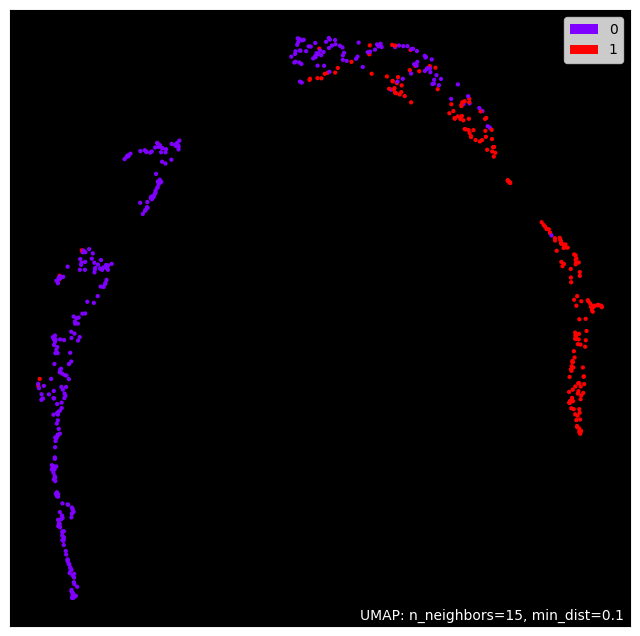

In [ ]:
# creating Umap instance and fit
mapper = umap.UMAP().fit(X)
# visualasing reduction with diagnosis labels
umap.plot.points(mapper, labels=y, theme='fire')

# Could logistic regression get a close to XGboost ?
Looking at the scatter plot above, it seems that a linear model could peform well on this dataset. Let's try logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Test, train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling for convergence efficiency
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit and predict
reg = LogisticRegression(max_iter=100).fit(X_train,y_train)
y_pred = reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.9736842105263158
Precision: 1.0
Recall (Sensitivity): 0.9285714285714286
F1-Score: 0.9629629629629629


In [ ]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Logistic regression yield better scores, which is not suprising looking at the clear split shown by the umap plot, as linear models tend to perform well in that case.

## And what does ChatGPT say?

Comparing the metrics of the logistic regression classifier with the XGBoost classifier:

Logistic Regression Classifier:

* Precision: For benign tumors, the precision is 96%, slightly higher than the XGBoost classifier. For malignant tumors, the precision is also 100%, similar to the XGBoost classifier.

* Recall: Both for benign and malignant tumors, the recall scores are higher compared to the XGBoost classifier, with 100% for benign and 93% for malignant tumors.

* F1-score: The F1-scores for both benign and malignant tumors are slightly higher than those of the XGBoost classifier, indicating a better balance between precision and recall.

* Accuracy: The overall accuracy of the logistic regression classifier is 97%, slightly higher than the XGBoost classifier.


**Conclusion:**

The logistic regression classifier outperforms the XGBoost classifier in terms of precision, recall, F1-score, and accuracy.
* It demonstrates superior performance in correctly identifying both benign and malignant tumors, with higher precision and recall scores across the board.
* While the XGBoost classifier is effective, especially in distinguishing benign tumors, the logistic regression classifier offers better overall predictive performance.
* Considering these results, the logistic regression classifier may be the preferred choice for breast cancer diagnosis due to its higher accuracy and robust performance metrics. However, further evaluation, including considerations of computational efficiency and interpretability, may be necessary for a comprehensive comparison of the two models.

Not bad ! A minor mistake for the recall score of begnin tumor as they are actually equal.

## Does XGboost scores influence by scaling ?

In [ ]:
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred = bst.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.9298245614035088
Precision: 1.0
Recall (Sensitivity): 0.8095238095238095
F1-Score: 0.8947368421052632


Confirmed that XGBoost does not care about scaling, as mentionned on the XGBoost Github.
https://github.com/dmlc/xgboost/issues/357